<a href="https://colab.research.google.com/github/LeDinhMinh-hub/ML-Churn_Prediction/blob/main/LeDinhMinh_ML_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing & Loading data into the data frame


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
# Mount the Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/MyDrive/churn_prediction.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the DataFrame
df.head()

Mounted at /content/drive


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.tail(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


# **Overview the data**

## Check info & missing values:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

&#8594;This dataset has missing values

## Handling missing values:

In [ ]:
cols_to_fillna = ["Tenure", "WarehouseToHome", "HourSpendOnApp", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder"]
df[cols_to_fillna] = df[cols_to_fillna].fillna(df[cols_to_fillna].median(numeric_only=True))
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Check duplicated values:

In [ ]:
df.duplicated().unique()

array([False])

###Check imbalanced

In [ ]:
label_ratio = df['Churn'].value_counts(normalize=True)
label_ratio

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

The ration of label 1 on total is 16.8% → We can continue with the EDA and ML model

##Check correlation:

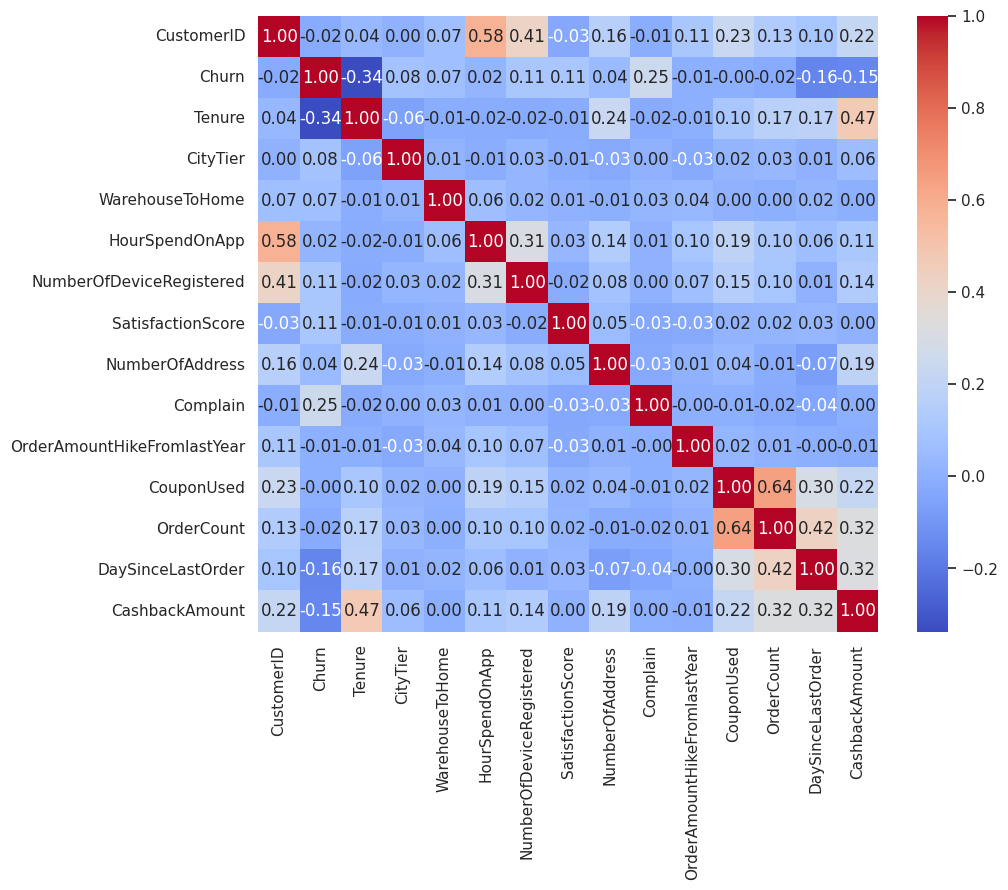

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")

Based on correlation heatmap, we see Tenure and Complain are correlated with Churn , in which Tenure and Churn have a negative correlation, while Complain and Churn  have a positive correlation

In [ ]:
def count_percentage(df, column, target, count):

    # Create 2 dataframes of churn and non-churn
    churn = df[df[target]==1].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
    not_churn = df[df[target]==0].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)

    #Merge 2 dataframe into one:
    cate_df = churn.merge(not_churn, on = column , how = 'outer')
    cate_df = cate_df.fillna(0)
    cate_df.rename(columns = {count+'_x':'churn',count+'_y':'not_churn'}, inplace = True)

    #Caculate the percentage:
    cate_df['%'] = cate_df['churn']/(cate_df['churn']+cate_df['not_churn'])

    return cate_df

##Tenure

In [ ]:
Tenure_churn = count_percentage(df, 'Tenure', 'Churn', 'CustomerID')
Tenure_churn

,Tenure,churn,not_churn,%
0,1.0,349.0,341,0.505797
1,0.0,272.0,236,0.535433
2,9.0,93.0,418,0.181996
3,4.0,20.0,183,0.098522
4,3.0,18.0,177,0.092308
5,5.0,16.0,188,0.078431
6,20.0,16.0,93,0.146789
7,7.0,16.0,205,0.072398
8,8.0,16.0,247,0.060837
9,2.0,14.0,153,0.083832


<ipython-input-87-59a78cbe1779>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_churn1_df, x='Tenure', y='CustomerID', ax=ax, palette=palette)


<Axes: xlabel='Tenure', ylabel='CustomerID'>

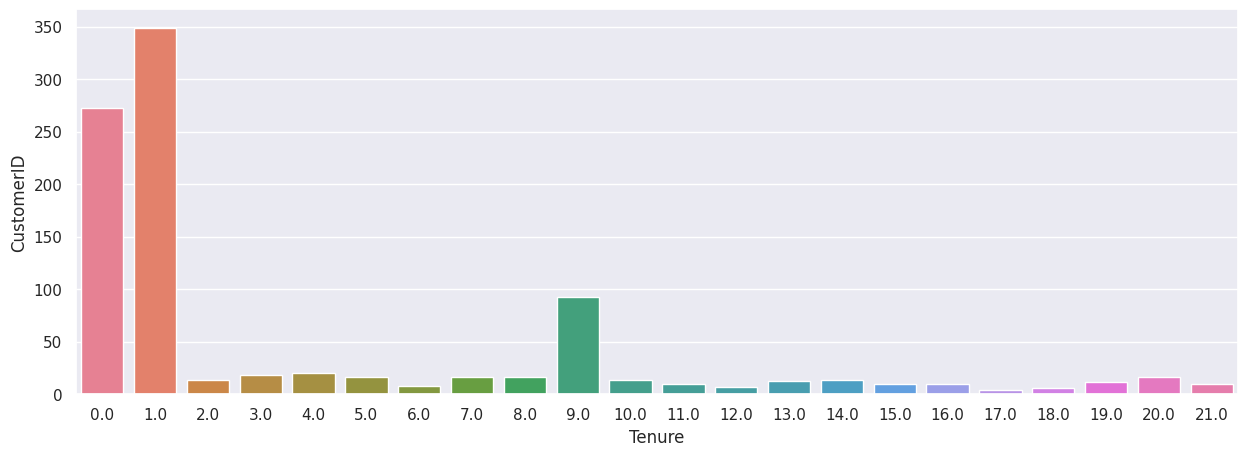

In [ ]:
# Filter the DataFrame for churned customers and group by 'Tenure'
plot_churn1_df = df[df['Churn'] == 1].groupby('Tenure')['CustomerID'].nunique().reset_index()

# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 5))

# Choose a color palette
palette = sns.color_palette("husl", len(plot_churn1_df))

# Create the barplot with the specified palette
sns.barplot(data=plot_churn1_df, x='Tenure', y='CustomerID', ax=ax, palette=palette)

**Churn customers are usually new customers**

##Login Device         

In [ ]:
logindevice_churn = count_percentage(df, 'PreferredLoginDevice', 'Churn', 'CustomerID')
logindevice_churn

,PreferredLoginDevice,churn,not_churn,%
0,Mobile Phone,348,2417,0.125859
1,Computer,324,1310,0.198286
2,Phone,276,955,0.224208


In [ ]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')

In [ ]:
logindevice_churn = count_percentage(df, 'PreferredLoginDevice', 'Churn', 'CustomerID')
logindevice_churn

,PreferredLoginDevice,churn,not_churn,%
0,Mobile Phone,624,3372,0.156156
1,Computer,324,1310,0.198286


##City Tier        

In [ ]:
CityTier_churn = count_percentage(df, 'CityTier', 'Churn', 'CustomerID')
CityTier_churn

,CityTier,churn,not_churn,%
0,1,532,3134,0.145117
1,3,368,1354,0.213705
2,2,48,194,0.198347


##Payment Mode

In [ ]:
paymentmode_churn = count_percentage(df, 'PreferredPaymentMode', 'Churn', 'CustomerID')
paymentmode_churn

,PreferredPaymentMode,churn,not_churn,%
0,Debit Card,356,1958,0.153846
1,Credit Card,193,1308,0.128581
2,E wallet,140,474,0.228013
3,COD,105,260,0.287671
4,UPI,72,342,0.173913
5,CC,59,214,0.216117
6,Cash on Delivery,23,126,0.154362


In [ ]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('UPI', 'Unified Payments Interface')

In [ ]:
paymentmode_churn = count_percentage(df, 'PreferredPaymentMode', 'Churn', 'CustomerID')
paymentmode_churn

,PreferredPaymentMode,churn,not_churn,%
0,Debit Card,356,1958,0.153846
1,Credit Card,252,1522,0.142052
2,E wallet,140,474,0.228013
3,Cash on Delivery,128,386,0.249027
4,Unified Payments Interface,72,342,0.173913


<ipython-input-25-57bc321431a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=paymentmode_churn, x='%', y='PreferredPaymentMode', palette=palette)


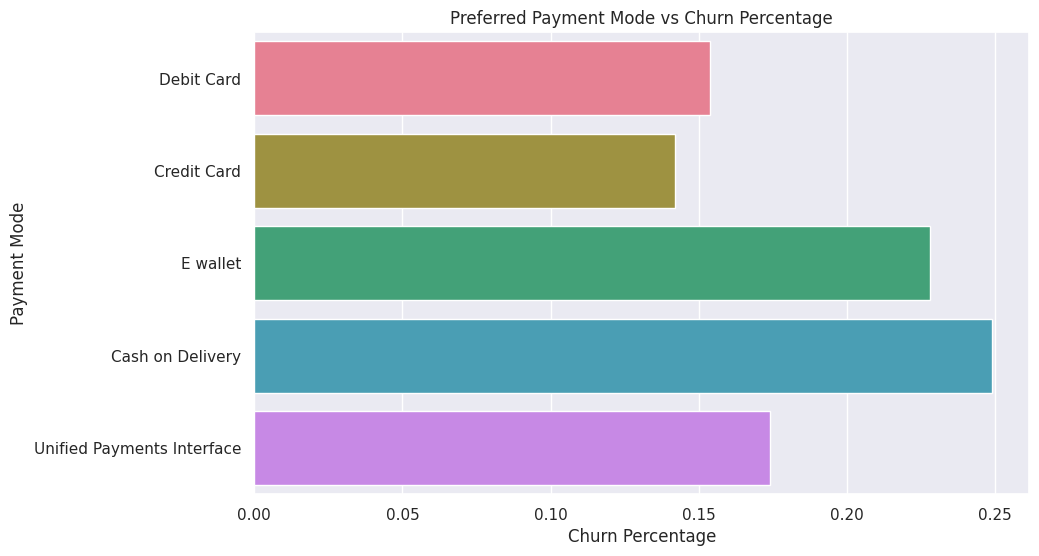

In [ ]:
# Define a color palette
palette = sns.color_palette("husl", len(paymentmode_churn))

plt.figure(figsize=(10, 6))
sns.barplot(data=paymentmode_churn, x='%', y='PreferredPaymentMode', palette=palette)
plt.title('Preferred Payment Mode vs Churn Percentage')
plt.xlabel('Churn Percentage')
plt.ylabel('Payment Mode')
plt.show()

##Gender

In [ ]:
gender_churn = count_percentage(df, 'Gender', 'Churn', 'CustomerID')
gender_churn

,Gender,churn,not_churn,%
0,Male,600,2784,0.177305
1,Female,348,1898,0.154942


##NumberOfDeviceRegistered

In [ ]:
NumberOfDeviceRegistered_churn = count_percentage(df, 'NumberOfDeviceRegistered', 'Churn', 'CustomerID')
NumberOfDeviceRegistered_churn

,NumberOfDeviceRegistered,churn,not_churn,%
0,4,392,1985,0.164914
1,3,254,1445,0.149500
2,5,198,683,0.224745
3,6,56,106,0.345679
4,2,26,250,0.094203
5,1,22,213,0.093617


<ipython-input-29-639ce0ef7cf0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=NumberOfDeviceRegistered_churn, x='NumberOfDeviceRegistered', y='%', palette=palette)
<ipython-input-29-639ce0ef7cf0>:5: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=NumberOfDeviceRegistered_churn, x='NumberOfDeviceRegistered', y='%', palette=palette)


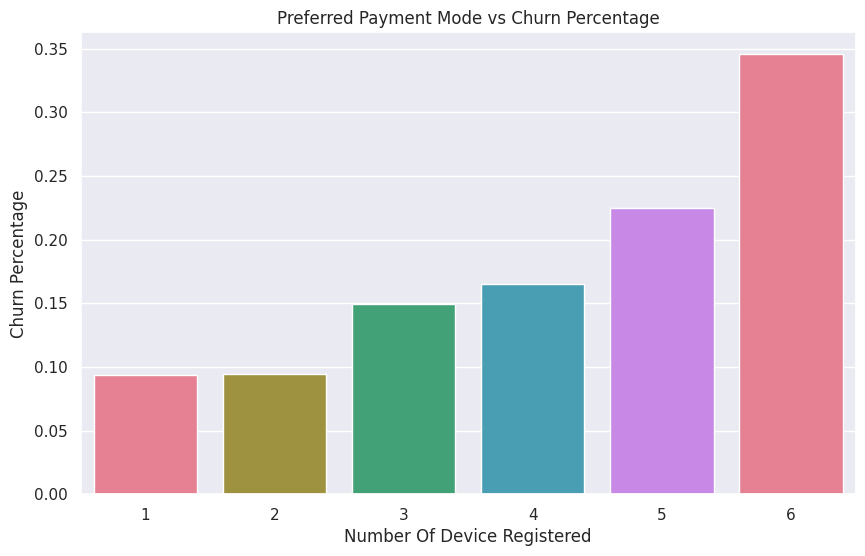

In [ ]:
# Define a color palette
palette = sns.color_palette("husl", len(paymentmode_churn))

plt.figure(figsize=(10, 6))
sns.barplot(data=NumberOfDeviceRegistered_churn, x='NumberOfDeviceRegistered', y='%', palette=palette)
plt.title('Preferred Payment Mode vs Churn Percentage')
plt.xlabel('Number Of Device Registered')
plt.ylabel('Churn Percentage')
plt.show()

**The more devices users use, the more likely they are to abandon the application**

##Order Cat

In [ ]:
ordercat_churn = count_percentage(df, 'PreferedOrderCat', 'Churn', 'CustomerID')
ordercat_churn

,PreferedOrderCat,churn,not_churn,%
0,Mobile Phone,350,921,0.275374
1,Mobile,220,589,0.271941
2,Laptop & Accessory,210,1840,0.102439
3,Fashion,128,698,0.154964
4,Grocery,20,390,0.048780
5,Others,20,244,0.075758


In [ ]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

In [ ]:
ordercat_churn = count_percentage(df, 'PreferedOrderCat', 'Churn', 'CustomerID')
ordercat_churn

,PreferedOrderCat,churn,not_churn,%
0,Mobile Phone,570,1510,0.274038
1,Laptop & Accessory,210,1840,0.102439
2,Fashion,128,698,0.154964
3,Grocery,20,390,0.048780
4,Others,20,244,0.075758


<ipython-input-51-8072a19f0983>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ordercat_churn, x='%', y='PreferedOrderCat', palette=palette)


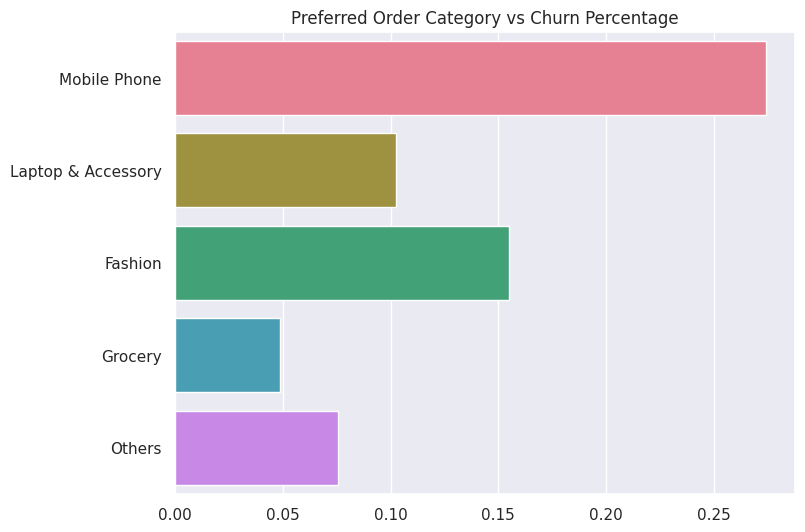

In [ ]:
palette = sns.color_palette("husl", len(ordercat_churn))

plt.figure(figsize=(8, 6))
sns.barplot(data=ordercat_churn, x='%', y='PreferedOrderCat', palette=palette)
plt.title('Preferred Order Category vs Churn Percentage')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Mobile phone users are more likely to abandon the app**

##Satisfaction Score

In [ ]:
SatisfactionScore_churn = count_percentage(df, 'SatisfactionScore', 'Churn', 'CustomerID')
SatisfactionScore_churn

,SatisfactionScore,churn,not_churn,%
0,3,292,1406,0.171967
1,5,264,844,0.238267
2,4,184,890,0.171322
3,1,134,1030,0.115120
4,2,74,512,0.126280


##Marital Status

In [ ]:
status_churn = count_percentage(df, 'MaritalStatus', 'Churn', 'CustomerID')
status_churn

,MaritalStatus,churn,not_churn,%
0,Single,480,1316,0.267261
1,Married,344,2642,0.115204
2,Divorced,124,724,0.146226


<ipython-input-54-037ef0708617>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=status_churn, x='%', y='MaritalStatus', palette=palette)


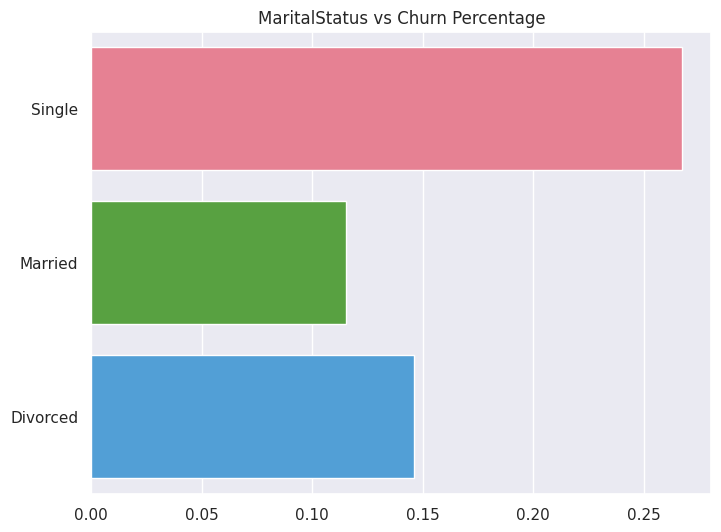

In [ ]:
palette = sns.color_palette("husl", len(status_churn))

plt.figure(figsize=(8, 6))
sns.barplot(data=status_churn, x='%', y='MaritalStatus', palette=palette)
plt.title('MaritalStatus vs Churn Percentage')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Single users tend to leave the app**

##Complain

In [ ]:
Complain_churn = count_percentage(df, 'Complain', 'Churn', 'CustomerID')
Complain_churn

,Complain,churn,not_churn,%
0,1,508,1096,0.316708
1,0,440,3586,0.109290


**Churning customers tend to complain more**

##Day Since Last Order

In [ ]:
DaySinceLastOrder_churn = count_percentage(df, 'DaySinceLastOrder', 'Churn', 'CustomerID')
DaySinceLastOrder_churn

,DaySinceLastOrder,churn,not_churn,%
0,3.0,184.0,1023.0,0.152444
1,1.0,182.0,432.0,0.296417
2,0.0,170.0,326.0,0.342742
3,2.0,122.0,670.0,0.154040
4,8.0,66.0,472.0,0.122677
5,7.0,65.0,382.0,0.145414
6,4.0,58.0,373.0,0.134571
7,5.0,28.0,200.0,0.122807
8,9.0,28.0,271.0,0.093645
9,6.0,16.0,97.0,0.141593


<ipython-input-71-3e40463d3df9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x=cate_column, y='%', ax=ax, palette='viridis')  # Change palette to any color palette you prefer


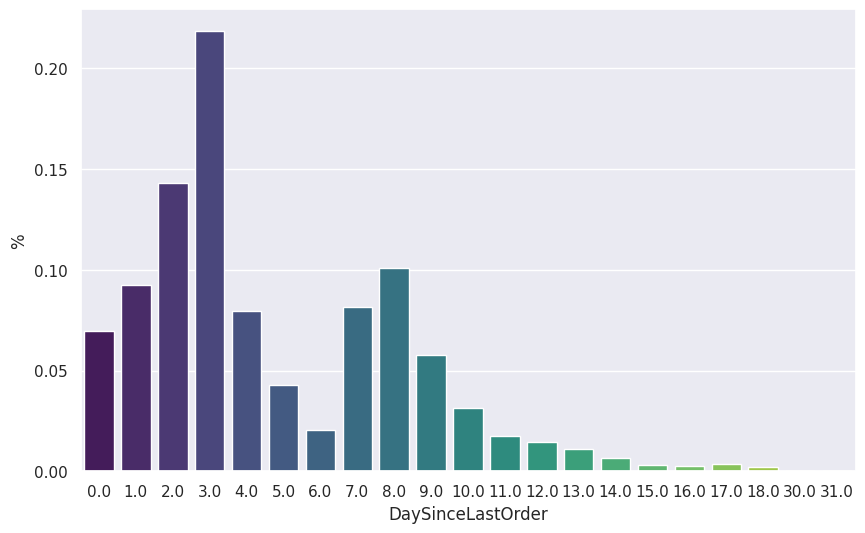

In [ ]:
def visual(cate_column, churnornot):
    plot_data = df[df['Churn'] == churnornot].groupby(cate_column)[['CustomerID']].nunique().reset_index()
    plot_data['%'] = plot_data['CustomerID'] / sum(plot_data['CustomerID'])
    fix, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(data=plot_data, x=cate_column, y='%', ax=ax, palette='viridis')  # Change palette to any color palette you prefer
visual('DaySinceLastOrder',0)

##Cash back Amount

In [ ]:
df['CashbackAmount'].sum()

997765.6599999999

In [ ]:
cashback_by_churn = df.groupby('Churn')['CashbackAmount'].sum()
total_cashback = cashback_by_churn.sum()
percentage_by_churn = cashback_by_churn / total_cashback * 100
print(percentage_by_churn)


Churn
0    84.762791
1    15.237209
Name: CashbackAmount, dtype: float64


<Axes: xlabel='Churn', ylabel='CashbackAmount'>

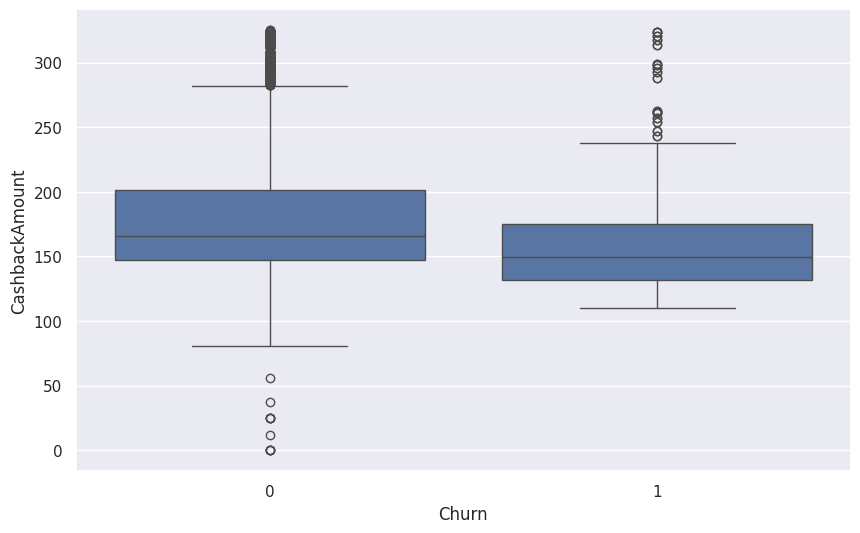

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='Churn',y='CashbackAmount')

 **Churn users receive less cashback amout than not churn users**

#**Question 1**: What are the patterns/behavior of churned users? What are your suggestions to the company to reduce churned users.

The patterns/behavior of churned users are:
- New customers
- Preferred Login Device and Prefered Order Cat: Mobile phone
- Gender of customer: Male
- Number Of Device Registered: too much
- MaritalStatus: Single
- Customers complain a lot
- Cashback Amount : low



Solution:
- Improve Onboarding for New Customers
- Enhance Mobile Experience
- Target Male Customers with Tailored Campaigns
- Manage Device Registrations
- Address Complaints Effectively
- Increase Cashback and Rewards
- Engage Single Customers
- Improve Overall User Experience

#**Conclusion**

After EDA, I keep:
- Tenure
- PreferredLoginDevice
- PreferedOrderCat
- NumberOfDeviceRegistered
- MaritalStatus
- Complain
- CashbackAmount

#Encoding & Normalizing


In [ ]:
df_model= df[['Churn','Tenure','PreferredLoginDevice','NumberOfDeviceRegistered','PreferedOrderCat', 'MaritalStatus','Complain', 'CashbackAmount']]
df_model

,Churn,Tenure,PreferredLoginDevice,NumberOfDeviceRegistered,PreferedOrderCat,MaritalStatus,Complain,CashbackAmount
0,1,4.0,Mobile Phone,3,Laptop & Accessory,Single,1,159.93
1,1,9.0,Mobile Phone,4,Mobile Phone,Single,1,120.90
2,1,9.0,Mobile Phone,4,Mobile Phone,Single,1,120.28
3,1,0.0,Mobile Phone,4,Laptop & Accessory,Single,0,134.07
4,1,0.0,Mobile Phone,3,Mobile Phone,Single,0,129.60
...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,2,Laptop & Accessory,Married,0,150.71
5626,0,13.0,Mobile Phone,5,Fashion,Married,0,224.91
5627,0,1.0,Mobile Phone,2,Laptop & Accessory,Married,1,186.42
5628,0,23.0,Computer,5,Laptop & Accessory,Married,0,178.90


In [ ]:
list_columns = ['PreferredLoginDevice','PreferedOrderCat','MaritalStatus']
df_model = pd.get_dummies(df_model, columns = list_columns)
df_model

,Churn,Tenure,NumberOfDeviceRegistered,Complain,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,1,159.93,False,True,False,False,True,False,False,False,False,True
1,1,9.0,4,1,120.90,False,True,False,False,False,True,False,False,False,True
2,1,9.0,4,1,120.28,False,True,False,False,False,True,False,False,False,True
3,1,0.0,4,0,134.07,False,True,False,False,True,False,False,False,False,True
4,1,0.0,3,0,129.60,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,2,0,150.71,True,False,False,False,True,False,False,False,True,False
5626,0,13.0,5,0,224.91,False,True,True,False,False,False,False,False,True,False
5627,0,1.0,2,1,186.42,False,True,False,False,True,False,False,False,True,False
5628,0,23.0,5,0,178.90,True,False,False,False,True,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Extract column names
list_columns = df_model.columns.tolist()

# Copy DataFrame
filter_df = df_model[list_columns]

# Initialize and fit the scaler
scaler = MinMaxScaler()
model = scaler.fit(filter_df)

# Transform data
scaled_data = model.transform(filter_df)

# Create new DataFrame with scaled data
df_model = pd.DataFrame(scaled_data, columns=list_columns)

df_model

,Churn,Tenure,NumberOfDeviceRegistered,Complain,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,0.065574,0.4,1.0,0.492107,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.147541,0.6,1.0,0.372011,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.147541,0.6,1.0,0.370104,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.000000,0.6,0.0,0.412536,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,0.4,0.0,0.398782,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.163934,0.2,0.0,0.463737,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5626,0.0,0.213115,0.8,0.0,0.692052,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.0,0.016393,0.2,1.0,0.573618,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5628,0.0,0.377049,0.8,0.0,0.550478,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


##Split data


In [ ]:
from sklearn.model_selection import train_test_split
x=df_model.drop('Churn', axis = 1)
y=df_model[['Churn']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

#Apply model

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf_log = LogisticRegression()
clf_log.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred_test = clf_log.predict(x_test)
y_pred_train = clf_log.predict(x_train)

Model Evaluation using Confusion Matrix

In [ ]:
y_pred = clf_log.predict(x_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1383,   31],
       [ 182,   93]])

Visualizing Confusion Matrix using Heatmap

Text(0.5, 709.5555555555555, 'Predicted label')

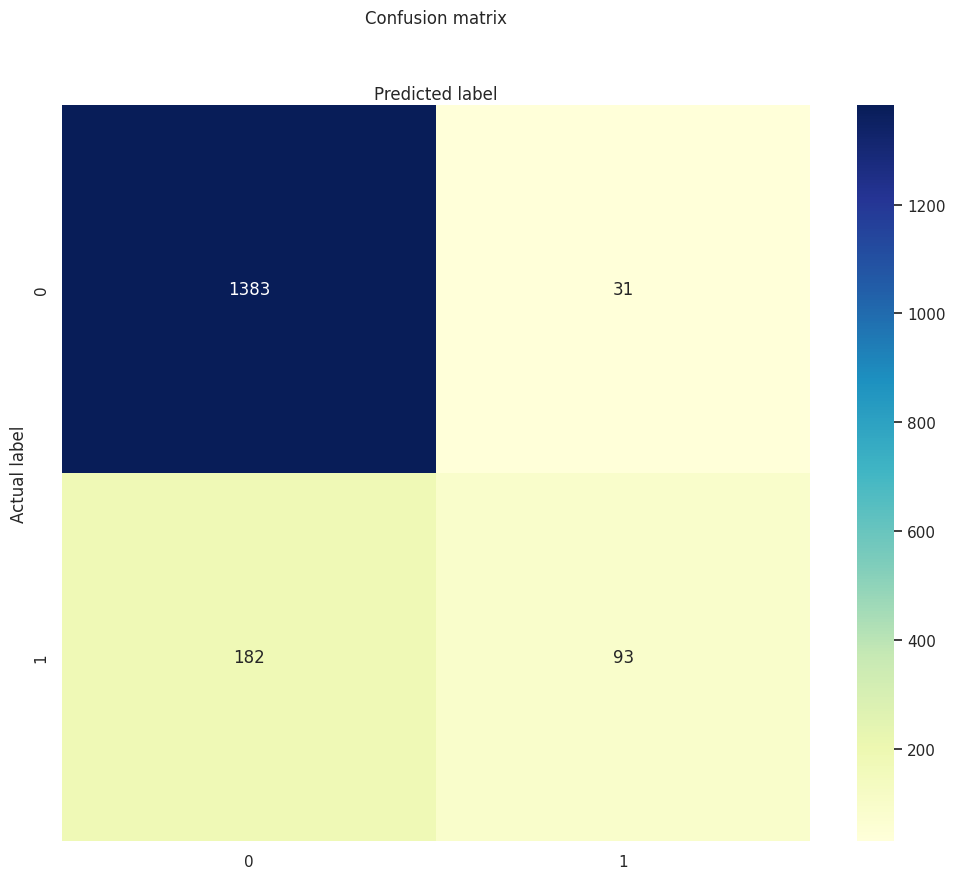

In [ ]:
# import required modules
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ROC Curve

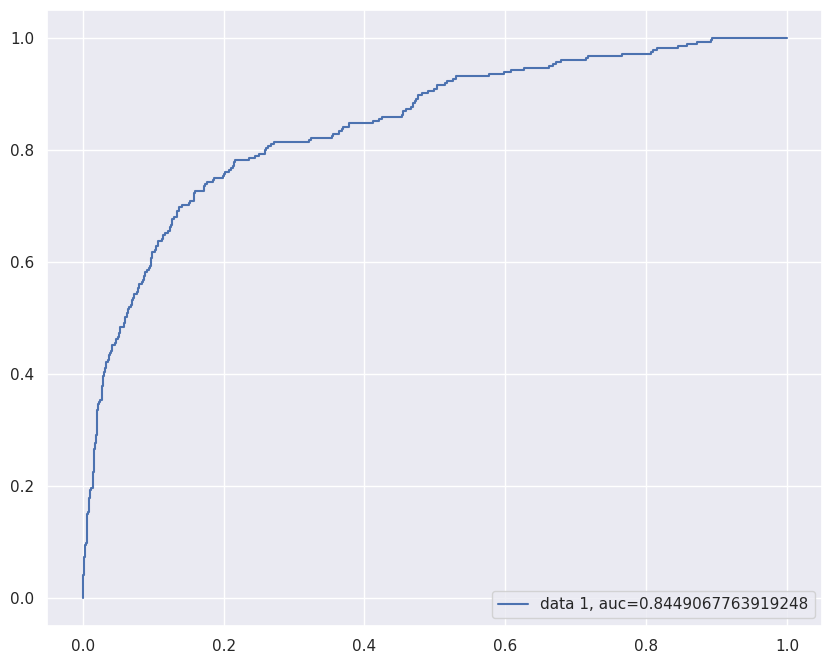

In [ ]:
y_pred_proba = clf_log.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)
print('Balanced accuracy train:', balanced_accuracy_train)
print('Balanced accuracy test:', balanced_accuracy_test)

Balanced accuracy train: 0.6784343110099101
Balanced accuracy test: 0.6581290986241481


###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
y_pred_tree_test = clf.predict(x_test)
y_pred_tree_train = clf.predict(x_train)

Evaluating the Model

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9354647720544701


In [ ]:
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_tree_train)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_tree_test)
print('Balanced accuracy train:', balanced_accuracy_train)
print('Balanced accuracy test:', balanced_accuracy_test)

Balanced accuracy train: 0.9998470012239902
Balanced accuracy test: 0.8732287514465733


###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_ran = DecisionTreeClassifier()
clf_ran.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_ran_test = clf_ran.predict(x_test)
y_pred_ran_train = clf_ran.predict(x_train)

In [ ]:
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_ran_train)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_ran_test)
print('Balanced accuracy train:', balanced_accuracy_train)
print('Balanced accuracy test:', balanced_accuracy_test)

Balanced accuracy train: 0.9998470012239902
Balanced accuracy test: 0.8706532081779607


**Decision Tree model has highest balanced accuracy score with: Balanced accuracy train: 0.999 , Balanced accuracy test: 0.873**

###Feature important

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_test.columns, clf_ran.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

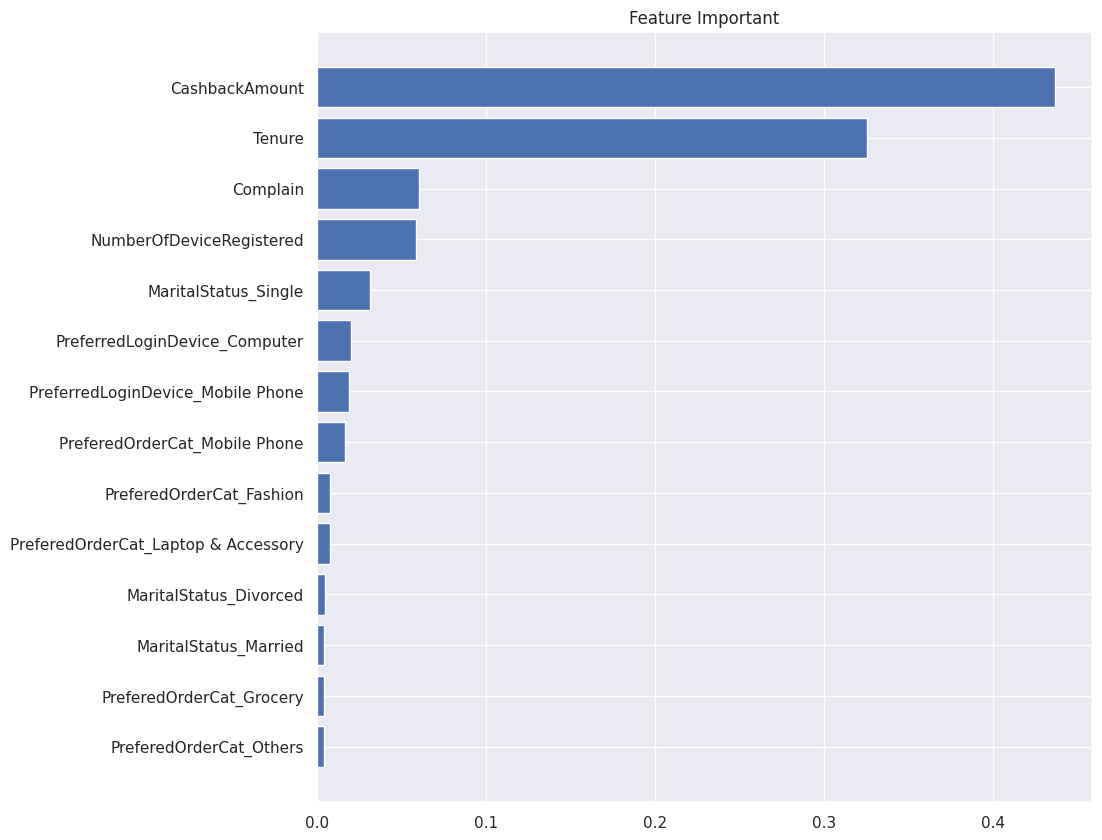

In [ ]:
# Visualize:
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()